In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.db import *
from scripts.plots import *
from scripts.stats import *
from scripts.statsTransferencia import *
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

resumen = dataNumerica()
data = pd.DataFrame.from_dict(resumen, orient='index')

#Trasnformamos los valores que interesan en columnas (Por ahora voy a hacer todo en angulos)
dataTest = pd.DataFrame()
dataTestI = pd.DataFrame()
dataTestF = pd.DataFrame()
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTestI["I"+col] = data['TestInicialAngulos'].map(lambda x: x[i])
    dataTest["I"+col] = data['TestInicialAngulos'].map(lambda x: x[i])
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTestF["F"+col] = data['TestFinalAngulos'].map(lambda x: x[i])
    dataTest["F"+col] = data['TestFinalAngulos'].map(lambda x: x[i]) 

/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:536: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_FaseActiva].replace('ExperimentoCompleto', 'TestFinal', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:508: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('A30', 'P30', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:510: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('P30', 'CONTROL', inplace=True)


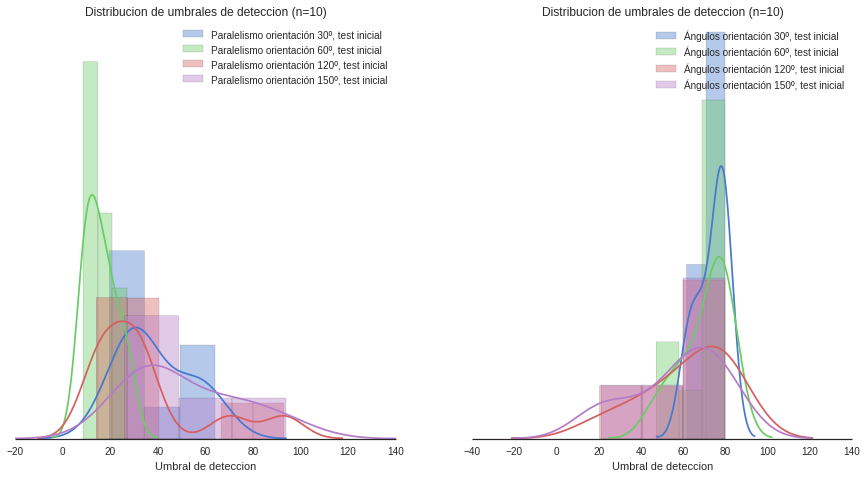

In [50]:
# Graficos de histogramas para nivel inicial completo
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.despine(left=True)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,7.5)



cosas = dataTest[['IP30','IP60','IP120','IP150']]
cosas.columns = ['Paralelismo orientación 30º, test inicial', 'Paralelismo orientación 60º, test inicial','Paralelismo orientación 120º, test inicial','Paralelismo orientación 150º, test inicial']
for col_id in cosas.columns:
    sns.distplot(cosas[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[0])

cosas = dataTest[['IA30','IA60','IA120','IA150']]
cosas.columns = ['Ángulos orientación 30º, test inicial', 'Ángulos orientación 60º, test inicial','Ángulos orientación 120º, test inicial','Ángulos orientación 150º, test inicial']
for col_id in cosas.columns:
    sns.distplot(cosas[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[1])

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title('Distribucion de umbrales de deteccion (n=10)')
    ax[i].legend()
    
fig.savefig('./Images/TransferenciaTestInicialHistogramasTotales', bbox_inches='tight')

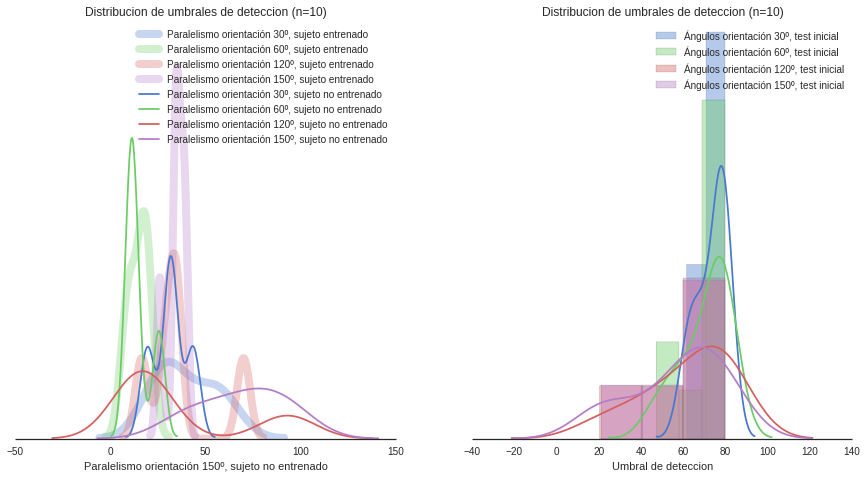

In [66]:
# Graficos de histogramas para nivel inicial comparando control y no control

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.despine(left=True)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,7.5)

colors = sns.color_palette()

# Paralelismo
SujetosEntrenados = dataTest[['IP30','IP60','IP120','IP150']].iloc[0:5]
SujetosEntrenados.columns = ['Paralelismo orientación 30º, sujeto entrenado', 'Paralelismo orientación 60º, sujeto entrenado','Paralelismo orientación 120º, sujeto entrenado','Paralelismo orientación 150º, sujeto entrenado']
SujetosNoEntrenados = dataTest[['IP30','IP60','IP120','IP150']].iloc[6:10]
SujetosNoEntrenados.columns = ['Paralelismo orientación 30º, sujeto no entrenado', 'Paralelismo orientación 60º, sujeto no entrenado','Paralelismo orientación 120º, sujeto no entrenado','Paralelismo orientación 150º, sujeto no entrenado']

for i, col_id in enumerate(SujetosEntrenados.columns):
    sns.distplot(SujetosEntrenados[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[0], hist=False, 
                 color=colors[i],kde_kws={"lw":8,"alpha":0.3})
for i, col_id in enumerate(SujetosNoEntrenados.columns):
    sns.distplot(SujetosNoEntrenados[col_id], label=col_id, ax=ax[0], hist=False, color=colors[i])

# Angulos
cosas = dataTest[['IA30','IA60','IA120','IA150']]
cosas.columns = ['Ángulos orientación 30º, test inicial', 'Ángulos orientación 60º, test inicial','Ángulos orientación 120º, test inicial','Ángulos orientación 150º, test inicial']
for col_id in cosas.columns:
    sns.distplot(cosas[col_id], label=col_id, axlabel='Umbral de deteccion', ax=ax[1])

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title('Distribucion de umbrales de deteccion (n=10)')
    ax[i].legend()
    
fig.savefig('./Images/TransferenciaTestInicialHistogramasTotales', bbox_inches='tight')

In [53]:
data

,EntrenamientoMedio,EvolucionAngulos,TestInicialAngulos,TestFinalAngulos,EntrenamientoInicial,EntrenamientoFinal,EntrenamientoFinalEnAngulos,TestInicial,Orientacion,TestFinal,EntrenamientoMedioEnAngulos,EntrenamientoInicialEnAngulos,Evolucion
Sujeto01,"[101, 160, 152, 157]","[-29.9, -7.8, -22.0, -30.7, -46.8, -61.6, -2.0...","[57.5, 17.0, 34.0, 39.5, 79.6, 78.4, 79.6, 79.6]","[27.6, 9.2, 12.0, 8.8, 32.8, 16.8, 77.6, 71.6]","[36, 186, 170, 160]","[139, 164, 164, 152]","[24.4, 14.4, 14.4, 19.2]","[85, 166, 132, 121, 1, 4, 1, 1]",A30,"[131, 177, 170, 178, 118, 158, 6, 21]","[39.6, 16.0, 19.2, 17.2]","[65.6, 5.6, 12.0, 16.0]","[46, 11, 38, 57, 117, 154, 5, 20]"
Sujeto02,"[161, 160, 163, 148]","[-29.7, -9.9, -54.8, -1.1, -57.2, -49.2, -46.8...","[54.5, 19.5, 70.0, 37.5, 78.0, 76.0, 59.6, 22.4]","[24.8, 9.6, 15.2, 36.4, 20.8, 26.8, 12.8, 35.2]","[150, 158, 166, 151]","[159, 166, 152, 159]","[16.4, 13.6, 19.2, 16.4]","[91, 161, 60, 125, 5, 10, 51, 144]",A30,"[138, 176, 162, 109, 148, 133, 168, 112]","[15.6, 16.0, 14.8, 20.8]","[20.0, 16.8, 13.6, 19.6]","[47, 15, 102, -16, 143, 123, 117, -32]"
Sujeto03,"[163, 148, 170, 151]","[-16.4, -8.0, -18.5, 5.2, 0.0, -38.8, 4.0, 15.2]","[30.0, 18.0, 34.5, 26.0, 70.8, 77.2, 48.4, 21.2]","[13.6, 10.0, 16.0, 31.2, 70.8, 38.4, 52.4, 36.4]","[157, 132, 154, 163]","[162, 174, 164, 180]","[19.0, 13.0, 18.0, 10.0]","[140, 164, 131, 148, 23, 7, 79, 147]",P30,"[166, 175, 160, 122, 23, 104, 69, 109]","[18.5, 26.0, 15.0, 24.5]","[21.5, 34.0, 23.0, 18.5]","[26, 11, 29, -26, 0, 97, -10, -38]"
Sujeto04,"[160, 1, 2, 2]","[1.2, -5.3, -20.1, 15.1, -1.2, -14.0, -15.2, -...","[28.0, 10.5, 28.5, 34.5, 79.6, 68.8, 61.6, 42.0]","[29.2, 5.2, 8.4, 49.6, 78.4, 54.8, 46.4, 36.0]","[165, 1, 1, 1]","[183, 7, 1, 1]","[8.5, 0, 0, 0]","[144, 179, 143, 131, 1, 28, 46, 95]",P30,"[127, 187, 179, 76, 4, 63, 84, 110]","[20.0, 0, 0, 0]","[17.5, 0, 0, 0]","[-17, 8, 36, -55, 3, 35, 38, 15]"
Sujeto05,"[175, 170, 182, 170]","[-18.8, 3.5, -10.1, -20.5, -27.2, -25.2, -2.0,...","[30.0, 8.5, 16.5, 34.5, 77.2, 56.8, 38.0, 55.6]","[11.2, 12.0, 6.4, 14.0, 50.0, 31.6, 36.0, 25.2]","[152, 169, 174, 180]","[167, 175, 185, 179]","[16.5, 12.5, 7.5, 10.5]","[140, 183, 167, 131, 7, 58, 105, 61]",P30,"[172, 170, 184, 165, 75, 121, 110, 137]","[12.5, 15.0, 9.0, 15.0]","[24.0, 15.5, 13.0, 10.0]","[32, -13, 17, 34, 68, 63, 5, 76]"
Sujeto06,"[0, 0, 0, 0]","[-43.6, -7.8, 3.2, -51.2, 15.2, -34.0, 0.4, 0.0]","[64.0, 27.0, 30.0, 68.0, 63.2, 78.4, 79.2, 79.6]","[20.4, 19.2, 33.2, 16.8, 78.4, 44.4, 79.6, 79.6]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[72, 146, 140, 64, 42, 4, 2, 1]",CONTROL,"[149, 152, 117, 158, 4, 89, 1, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]","[77, 6, -23, 94, -38, 85, -1, 0]"
Sujeto07,"[0, 0, 0, 0]","[8.1, 0.4, -79.8, -53.2, -54.0, -25.6, -43.2, ...","[19.5, 10.0, 93.0, 80.0, 77.6, 79.6, 74.4, 62.0]","[27.6, 10.4, 13.2, 26.8, 23.6, 54.0, 31.2, 18.0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[161, 180, 14, 40, 6, 1, 14, 45]",CONTROL,"[131, 174, 167, 133, 141, 65, 122, 155]","[0, 0, 0, 0]","[0, 0, 0, 0]","[-30, -6, 153, 93, 135, 64, 108, 110]"
Sujeto08,"[0, 0, 0, 0]","[-2.4, -1.4, -1.2, -9.2, 1.6, -33.2, -0.4, 1.6]","[32.0, 13.0, 14.0, 40.0, 67.6, 47.2, 79.6, 66.0]","[29.6, 11.6, 12.8, 30.8, 69.2, 14.0, 79.2, 67.6]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[136, 174, 172, 120, 31, 82, 1, 35]",CONTROL,"[126, 171, 168, 123, 27, 165, 2, 31]","[0, 0, 0, 0]","[0, 0, 0, 0]","[-10, -3, -4, 3, -4, 83, 1, -4]"
Sujeto09,"[0, 0, 0, 0]","[-3.9, -7.5, 28.4, 5.4, 15.6, 8.8, 59.2, 2.0]","[31.5, 25.5, 22.0, 63.0, 61.6, 61.6, 20.4, 74.8]","[27.6, 18.0, 50.4, 68.4, 77.2, 70.4, 79.6, 76.8]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[137, 149, 156, 74, 46, 46, 149, 13]",CONTROL,"[131, 155, 74, 29, 7, 24, 1, 8]","[0, 0, 0, 0]","[0, 0, 0, 0]","[-6, 6, -82, -45, -39, -22, -148, -5]"
Sujeto10,"[0, 0, 0, 0]","[-8.7, 16.6, -11.0, -83.6, -28.0, 0.0, 0.0, 7.2]","[43.5, 11.0, 15.0, 94.0, 79.6, 79.6, 79.6, 67.6]","[34.8, 27.6, 4.0, 10.4, 51.6, 79.6, 79.6, 74.